<a href="https://colab.research.google.com/github/ram-ctrl/final_year_project-fianl-/blob/main/finaly_year_project(credit_card_fruad_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Numpy: 1.21.6
Pandas: 1.3.5
Matplotlib: 3.2.2
Seaborn: 0.11.2
Scipy: 1.4.1


In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("/fraud_data.csv")


In [ ]:
# Grab a peek at the data
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [ ]:
# Start exploring the dataset
print(data.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [ ]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())


(21693, 30)
                 V1            V2            V3            V4            V5  \
count  21693.000000  21693.000000  21693.000000  21693.000000  21693.000000   
mean      -0.032403      0.047565     -0.091623      0.057805     -0.033983   
std        2.106997      1.690911      1.870289      1.540329      1.530508   
min      -41.928738    -40.803981    -31.103685     -4.848504    -32.092129   
25%       -0.929371     -0.592921     -0.962975     -0.850069     -0.698296   
50%        0.007545      0.075215      0.176534     -0.012868     -0.063948   
75%        1.315678      0.819749      1.020809      0.772388      0.615287   
max        2.451888     21.467203      4.069865     12.114672     29.162172   

                 V6            V7            V8            V9           V10  \
count  21693.000000  21693.000000  21693.000000  21693.000000  21693.000000   
mean      -0.023207     -0.074203      0.002096     -0.044311     -0.091073   
std        1.340599      1.596775      

In [ ]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())


(2169, 30)
                V1           V2           V3           V4           V5  \
count  2169.000000  2169.000000  2169.000000  2169.000000  2169.000000   
mean     -0.004854     0.041699    -0.043055     0.067232    -0.049092   
std       2.141363     1.746387     1.853592     1.511847     1.360150   
min     -41.928738   -40.803981   -23.009003    -4.704106   -15.587296   
25%      -0.887155    -0.573788    -0.879046    -0.827054    -0.698453   
50%      -0.073626     0.074448     0.201457    -0.000517    -0.110474   
75%       1.349880     0.826440     1.083038     0.752361     0.564826   
max       2.396045    12.785971     3.790995    11.927512    11.095089   

                V6           V7           V8           V9          V10  ...  \
count  2169.000000  2169.000000  2169.000000  2169.000000  2169.000000  ...   
mean     -0.049566    -0.023981     0.006766    -0.039692    -0.092575  ...   
std       1.287721     1.407906     1.296524     1.126814     1.202878  ...   
min   

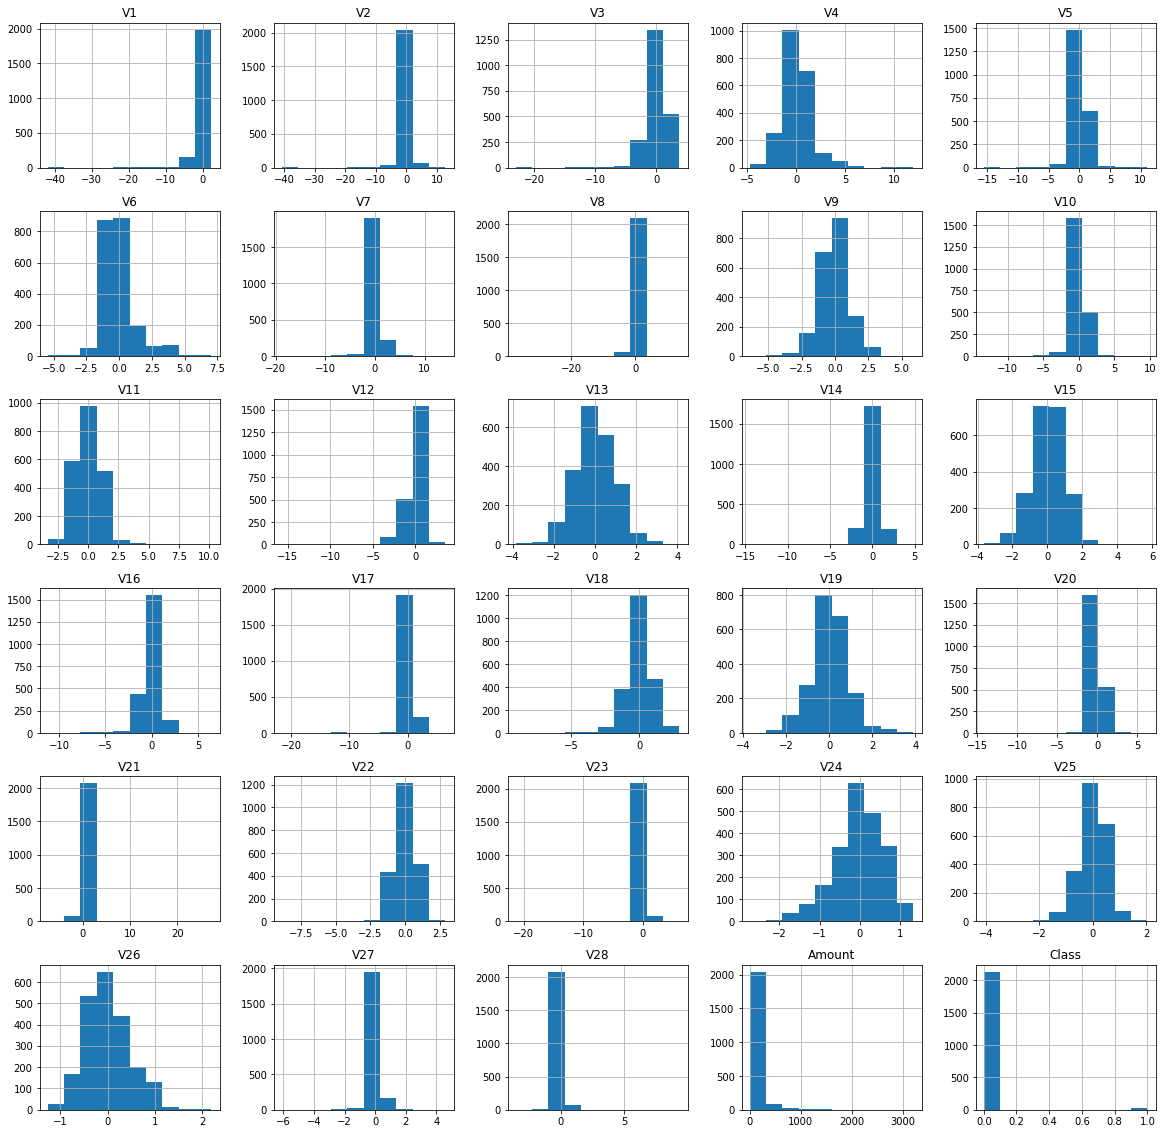

In [ ]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()


In [ ]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.01640112464854733
Fraud Cases: 35
Valid Transactions: 2134


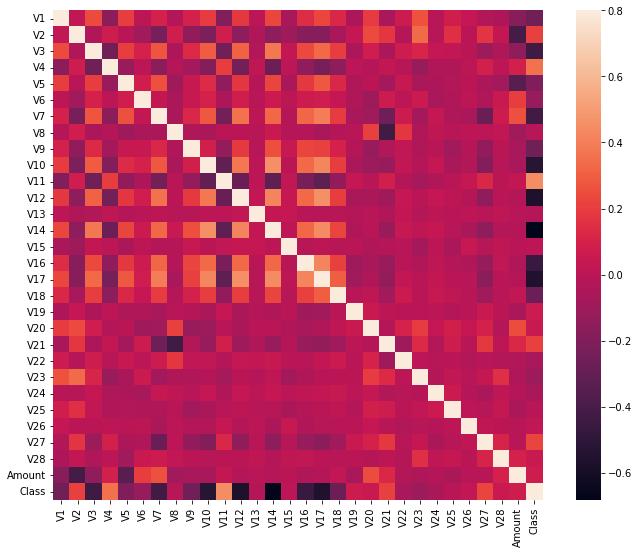

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [ ]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(2169, 29)
(2169,)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}


In [ ]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Isolation Forest: 31
0.9857076994006455
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2134
           1       0.56      0.57      0.56        35

    accuracy                           0.99      2169
   macro avg       0.77      0.78      0.78      2169
weighted avg       0.99      0.99      0.99      2169

Local Outlier Factor: 29
0.9866297833102813
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2134
           1       0.58      0.60      0.59        35

    accuracy                           0.99      2169
   macro avg       0.79      0.80      0.79      2169
weighted avg       0.99      0.99      0.99      2169



<Figure size 648x504 with 0 Axes>